In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Missing Value

In [3]:
# check for missing value
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [4]:
# 4 columns with missing value
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Handle Odd Value

In [5]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [6]:
df["meal"].replace("Undefined", "No Meal", inplace=True) #replace "Undefined" with "No Meal"

## Replace Unnecessary Data

In [9]:
df["guest"] = df["adults"]+df["children"]+df["babies"]
#check if there is zero guest value
print(df[df["guest"]==0].shape[0])

df1 = df[df["guest"] > 0].copy()

180


# Perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [ ]:
df1group = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df1group

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [ ]:
df1group['average'] = round(df1group['count']/df1group['nunique'])
df1group

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [ ]:
df1group["month_short"] = df1group["arrival_date_month"].str[:3]
df1group["month_short"] = pd.Categorical(df1group["month_short"], categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True) # mengurutkan bulan
df1group

,hotel,arrival_date_month,nunique,count,average,month_short
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


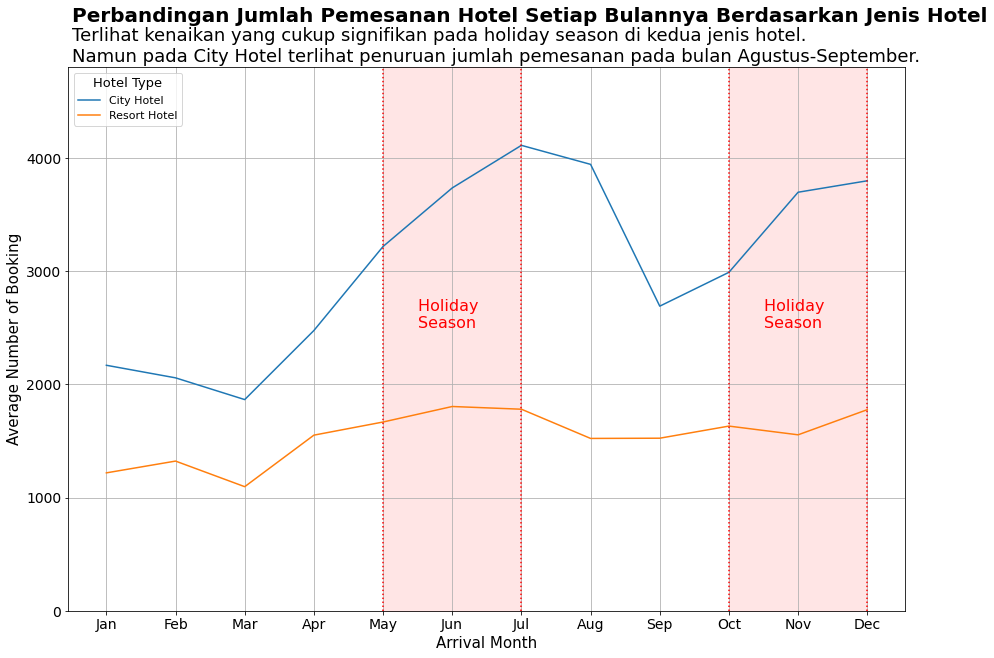

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month_short', y='average', hue='hotel', data=df1group)

plt.grid()
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':11})
plt.xlabel('Arrival Month', fontsize=15) 
plt.ylabel('Average Number of Booking', fontsize=15) 
plt.ylim(0, 4800)
plt.tick_params(axis='both', labelsize=14)
plt.text(x=-0.5, y=5200, s="Perbandingan Jumlah Pemesanan Hotel Setiap Bulannya Berdasarkan Jenis Hotel", fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=4850, s="Terlihat kenaikan yang cukup signifikan pada holiday season di kedua jenis hotel. \nNamun pada City Hotel terlihat penuruan jumlah pemesanan pada bulan Agustus-September.", fontsize=18)

plt.axvline(4,ls='dotted', color='red')
plt.axvline(6,ls='dotted', color='red')
plt.text(x=4.5, y=2500, s='Holiday \nSeason', fontsize=16, color='red') 
plt.stackplot([4,5,6], [4800], color='red', alpha=0.1) 

plt.axvline(9, ls='dotted', color='red')
plt.axvline(11,ls='dotted', color='red') 
plt.text(x=9.5, y=2500, s='Holiday \nSeason', fontsize=16, color='red') 
plt.stackplot([9,10,11], [4800], color='red', alpha=0.1);

#Pengaruh Durasi Menginap terhadap tingkat Pembatalan Pemesanan Hotel

In [ ]:
df1["durasi"] = df1["stays_in_weekend_nights"] + df1["stays_in_weekdays_nights"]

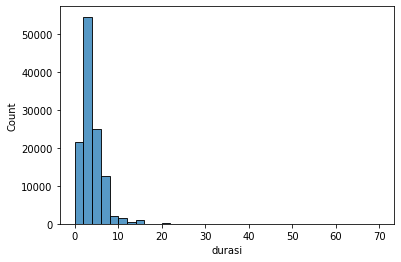

In [ ]:
sns.histplot(x=df1['durasi'],binwidth=2);

In [ ]:
df1['durasi_group'] = np.where(df1['durasi'] >= 20, 20, 
                                       np.where(df1['durasi'] >= 15, 15, df1['durasi']))

In [ ]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,durasi,durasi_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


In [ ]:
df1_group = df1.groupby(['hotel', 'is_canceled', 'durasi_group'])['arrival_date_year'].count().reset_index(name='jumlahpesanan')
df1_pivot = df1_group.pivot_table(index=['hotel', 'durasi_group'], columns='is_canceled', values='jumlahpesanan').reset_index()
df1_pivot['percent_canceled'] = round(df1_pivot[1]/((df1_pivot[0]+df1_pivot[1]))*100, 2)

df1_pivot

is_canceled,hotel,durasi_group,0,1,percent_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


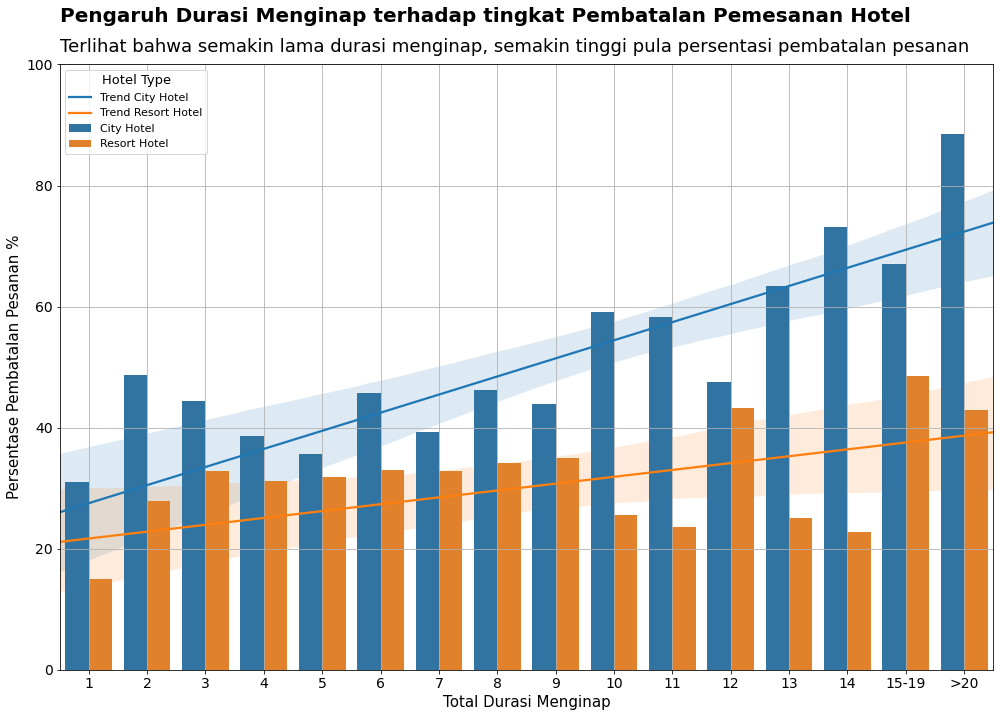

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df1_pivot, x='durasi_group', y='percent_canceled', hue='hotel')
sns.regplot(data=df1_pivot[df1_pivot['hotel'] == 'City Hotel'], x='durasi_group', y='percent_canceled', scatter=False, label='Trend City Hotel')
sns.regplot(data=df1_pivot[df1_pivot['hotel'] == 'Resort Hotel'], x='durasi_group', y='percent_canceled', scatter=False, label='Trend Resort Hotel')

plt.grid()
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':11})
plt.xlabel('Total Durasi Menginap', fontsize=15) 
plt.ylabel('Persentase Pembatalan Pesanan %', fontsize=15) 
plt.tick_params(axis='both', labelsize=14)
plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-19",">20"])
plt.ylim(0, 100)
plt.xlim(0.5, 16.5)

plt.text(x=0.5, y=107, s="Pengaruh Durasi Menginap terhadap tingkat Pembatalan Pemesanan Hotel", fontsize=20, fontweight='bold')
plt.text(x=0.5, y=102, s="Terlihat bahwa semakin lama durasi menginap, semakin tinggi pula persentasi pembatalan pesanan", fontsize=18)

plt.tight_layout()

#Pengaruh Jarak waktu Pemesanan dengan Hari Kedatangan terhadap Tingkat Pembatalan Pemesanan Hotel

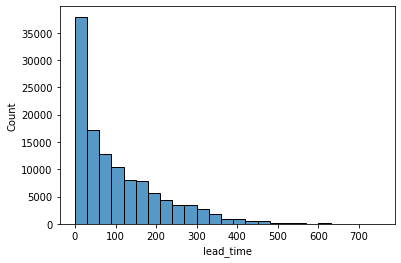

In [ ]:
sns.histplot(data=df1, x="lead_time", binwidth=30)

In [ ]:
df1['leadtime'] = np.where(df1['lead_time'] > 365, 366, df1['lead_time'])
bins = list(np.arange(0,max(df1['leadtime'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df1['leadtime_group'] = pd.cut(df1['leadtime'],bins=bins, include_lowest=True, labels=labels)

In [ ]:
df1_group = df1.groupby(['hotel','leadtime_group', 'is_canceled'])['hotel'].count().reset_index(name='jumlahpesanan')
df1_pivot = df1_group.pivot_table(index=['hotel','leadtime_group'], columns='is_canceled', values='jumlahpesanan').reset_index()
df1_pivot['percent_canceled'] = round(df1_pivot[1]/((df1_pivot[0]+df1_pivot[1]))*100, 2)

df1_pivot.head()

is_canceled,hotel,leadtime_group,0,1,percent_canceled
0,City Hotel,0-30,18060,5184,22.30
1,City Hotel,30-60,7266,4608,38.81
2,City Hotel,60-90,5210,3692,41.47
3,City Hotel,90-120,3956,3486,46.84
4,City Hotel,120-150,3064,2542,45.34


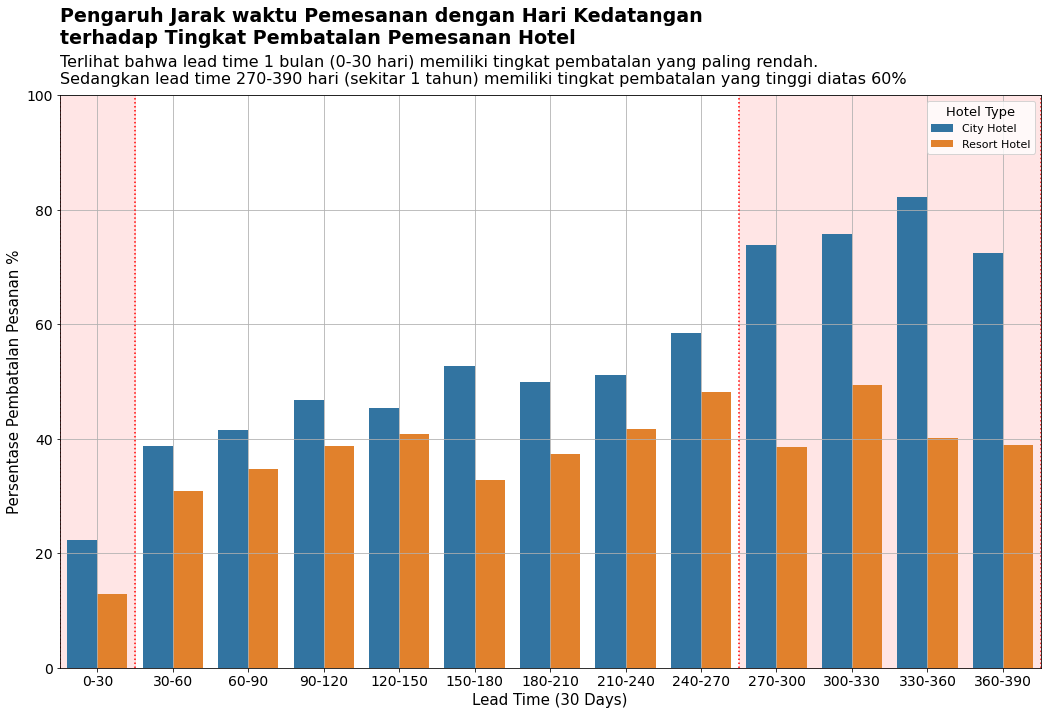

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df1_pivot, x='leadtime_group', y='percent_canceled', hue='hotel')

plt.grid()
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':11})
plt.xlabel('Lead Time (30 Days)', fontsize=15) 
plt.ylabel('Persentase Pembatalan Pesanan %', fontsize=15) 
plt.tick_params(axis='both', labelsize=14)
plt.ylim(0, 100)
plt.xlim(-0.5, 12.5)

plt.axvline(8.5,ls='dotted', color='red')
plt.axvline(12.5,ls='dotted', color='red')
plt.stackplot([8.5,10.5,11.5,12.5], [100], color='red', alpha=0.1)

plt.axvline(-0.5,ls='dotted', color='red')
plt.axvline(0.5,ls='dotted', color='red')
plt.stackplot([-0.5,0,0.5], [100], color='red', alpha=0.1)

plt.text(x=-0.5, y=109, s="Pengaruh Jarak waktu Pemesanan dengan Hari Kedatangan \nterhadap Tingkat Pembatalan Pemesanan Hotel", fontsize=19, fontweight='bold')
plt.text(x=-0.5, y=102, s="Terlihat bahwa lead time 1 bulan (0-30 hari) memiliki tingkat pembatalan yang paling rendah.\nSedangkan lead time 270-390 hari (sekitar 1 tahun) memiliki tingkat pembatalan yang tinggi diatas 60%   ", fontsize=16)

plt.tight_layout()